# Neural network exercises: Regression

In this notebook, we will have a quick look at a regression neural network. The exercises are very short, but can be useful just for understanding the basic mechanics of the framework we use. Here we run [Keras](keras.io), which one of the two major ones (the other being [PyTorch](https://pytorch.org/)). You are of course free to use either one.

In [1]:
# Imports
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

Gererate and plot some random data.

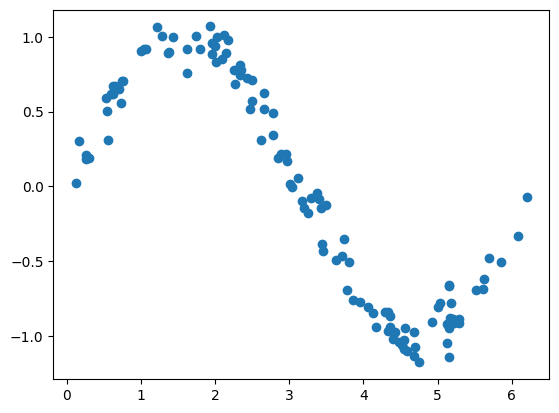

In [2]:
rng = np.random.default_rng()

def random_data(num_samples=120):
    x = rng.uniform(0, 2*np.pi, size=num_samples)
    y = np.sin(x) + rng.normal(size=num_samples, scale=0.1)

    x = np.expand_dims(x, axis=1)
    y = np.expand_dims(y, axis=1)
    return x, y


X, Y = random_data()
plt.scatter(X, Y)

## Activation functions

Let's investigate the impact of selecting different activation functions. This snippet makes a plot of three common ones -- for more, have a look at https://keras.io/api/layers/activations/.

In [ ]:
relu = tf.keras.activations.relu
tanh = tf.keras.activations.tanh
softplus = tf.keras.activations.softplus

x_activ = np.linspace(-3, 3, 100)
plt.figure()

for activ_func in [relu, tanh, softplus]:
    plt.plot(x_activ, activ_func(x_activ), label=activ_func.__name__)

plt.legend()

Train a simple regression model, like the one we saw in lectures. We use `Dense` layers, which are just the "ordinary" ones. If we want to process images or text, we need different types of layers.

In [ ]:
# This is the model specification. We have two hidden layers, with ten nodes each.
# To predict a single value, we need a single node in the output layer.
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(10, activation=tanh),     # modify here
        tf.keras.layers.Dense(10, activation=tanh),     # modify here
        tf.keras.layers.Dense(1, activation=None)       # for regression, don't apply activation in last layer
    ]
)

# Compile the model. Necessary for the framework to figure out the computation graph
model.compile(
    loss='mse', # Loss function: mean squared error
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01)
)

# The training step. `epochs` indicate the numer of iterations.
model.fit(X, Y, epochs=250, verbose=0)

# Plot the training data
plt.scatter(X, Y)

# Plot the predicted function, by making a grid og x-values and predicting the
# y-value for each of them
x_grid = np.linspace(0, 2*np.pi, num=200)[:, np.newaxis]
preds = model.predict(x_grid)
plt.plot(x_grid, preds, color="darkorange", linewidth=2)

## Exercise 1

Change the activation functions above, and see of the prediction line changes.

## Exercise 2
Vary the number of epochs, and see if a low number of iterations results in underfitting, and if a large number results in overfitting.

## Exercise 3
Change the model architure by adding or removing layers and nodes. Again check for under- and overfitting.